<h1><strong><u>Naive Bayes Model</u></strong><h1>

In [15]:
%%capture
%run DataPreparation.ipynb

<h2><strong><u>Naive Bayes Model Selection</u></strong></h2>

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
Gaussian takes no parameters. No 'Validation Curve' or 'Cross-Validation Test' section needed.

In [16]:
nb_classifier = GaussianNB().fit(X_train, y_train)

def nb_digit_classifier():
    return nb_classifier

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curve Tests</u></strong></h3>

In [17]:
for key, value in clf_metrics.items():
    bayesian_train_sizes, bayesian_train_scores, bayesian_validation_scores = learning_curve(
        nb_classifier,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    bayesian_train_scores_mean = np.mean(bayesian_train_scores, axis=1)
    bayesian_train_scores_std = np.std(bayesian_train_scores, axis=1)
    bayesian_validation_scores_mean = np.mean(bayesian_validation_scores, axis=1)
    bayesian_validation_scores_std = np.std(bayesian_validation_scores, axis=1)

    # Calculate spread of data around the mean
    bayesian_train_range_minus = bayesian_train_scores_mean - bayesian_train_scores_std
    bayesian_train_range_plus = bayesian_train_scores_mean + bayesian_train_scores_std
    bayesian_validation_range_minus = bayesian_validation_scores_mean - bayesian_validation_scores_std
    bayesian_validation_range_plus = bayesian_validation_scores_mean + bayesian_validation_scores_std

    lc_dict[key] = [[bayesian_train_scores_mean, bayesian_validation_scores_mean],
                    [bayesian_train_range_minus, bayesian_train_range_plus], 
                    [bayesian_validation_range_minus, bayesian_validation_range_plus], 
                    bayesian_train_sizes]

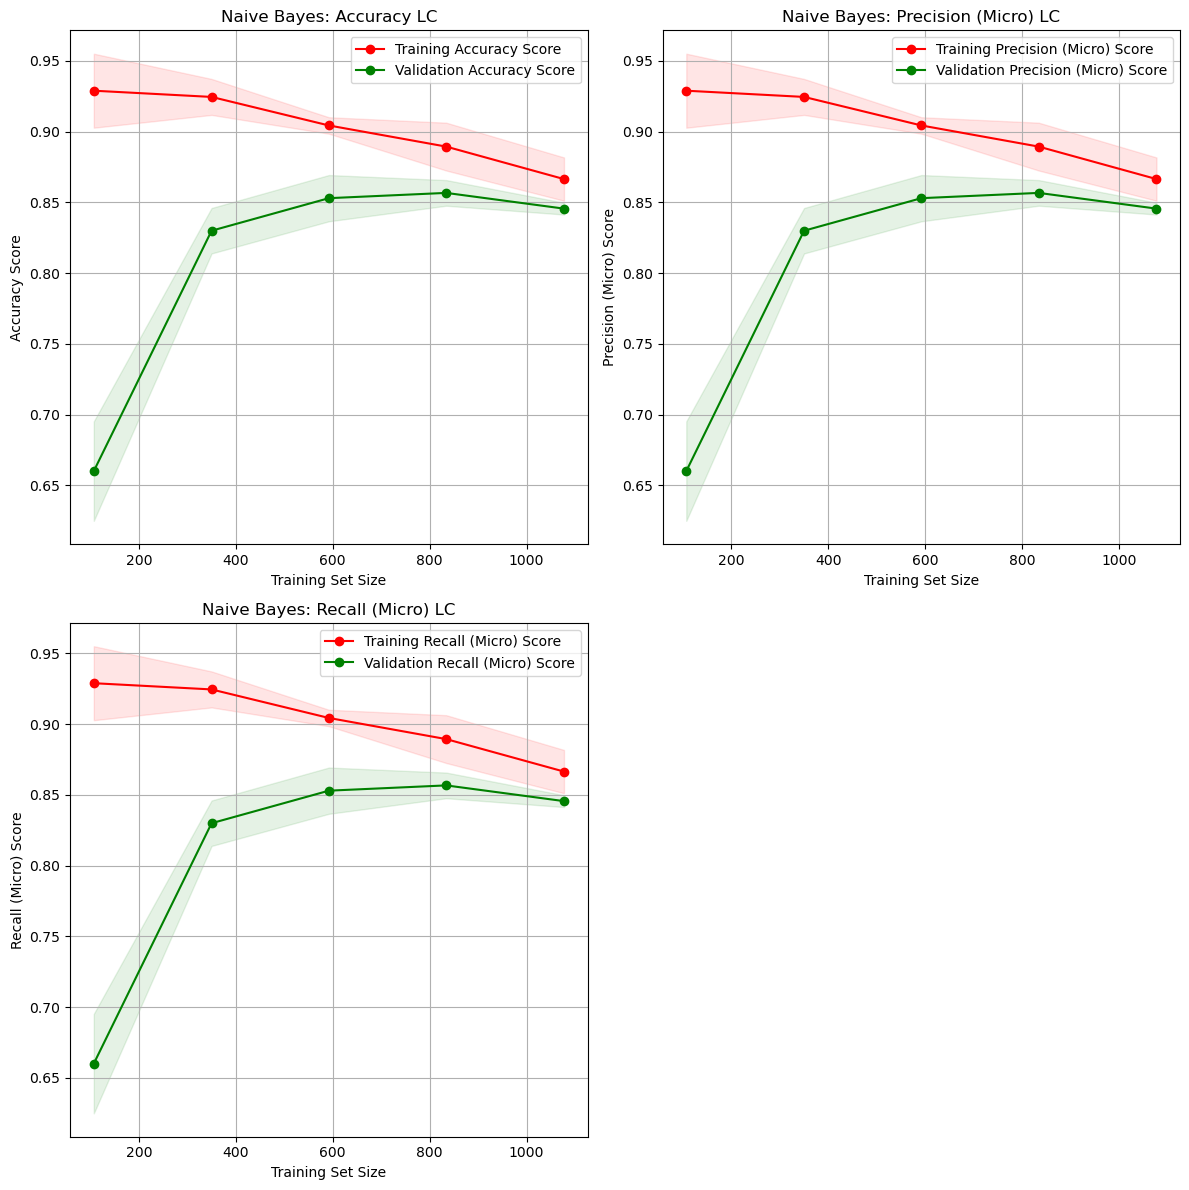

In [18]:
# Plot the learning curves
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in lc_dict.items():
    axs[count].set_title(f"Naive Bayes: {key} LC")
    axs[count].set_xlabel("Training Set Size")
    axs[count].set_ylabel(f"{key} Score")
    axs[count].grid()

    axs[count].fill_between(value[3], value[1][0], value[1][1], alpha=0.1, color="r")
    axs[count].fill_between(value[3], value[2][0], value[2][1], alpha=0.1, color="g")
    axs[count].plot(value[3], value[0][0], 'o-', color="r", label=f"Training {key} Score")
    axs[count].plot(value[3], value[0][1], 'o-', color="g", label=f"Validation {key} Score")
    axs[count].legend(loc="best")
    count += 1
    
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [19]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(nb_classifier, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [0.84074074 0.84074074 0.85130112 0.84758364 0.84758364]
Training Average and Standard Error:  0.85% ± 0.42% 

Precision (Micro)
CV Training Scores:  [0.84074074 0.84074074 0.85130112 0.84758364 0.84758364]
Training Average and Standard Error:  0.85% ± 0.42% 

Recall (Micro)
CV Training Scores:  [0.84074074 0.84074074 0.85130112 0.84758364 0.84758364]
Training Average and Standard Error:  0.85% ± 0.42% 



Text(0.5, 1.0, 'Naive Bayes: Confusion Matrix (Evaluation)')

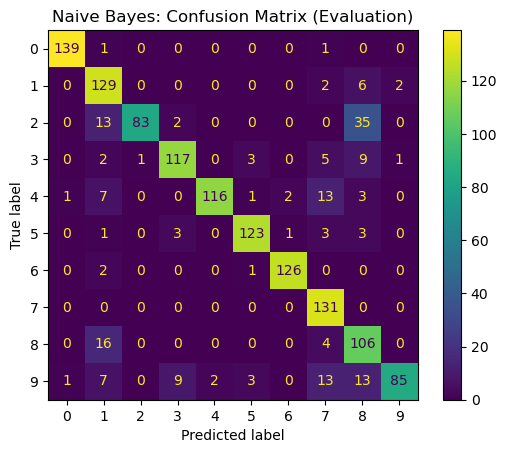

In [20]:
#Training Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(estimator=nb_classifier, X=X_train, y=y_train)
disp.ax_.set_title("Naive Bayes: Confusion Matrix (Evaluation)")

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
In the evaluation of my selected Naive Bayes model, I found decent results for all evaluation methods.